# Introduktion til beslutningstræer og randomiserede skove 

## Af Henrik Sterner

I det følgende introduceres beslutningstræer og randomiserede skove, der kan bruges til klassifikation og regression.

# Beslutningstræer
Et beslutningstræ er en model, der kan bruges til klassifikation og regression. Modellen er en træstruktur, hvor hver knude repræsenterer en beslutning, hver gren et resultat af beslutningen og hver bladnode et klassifikationsresultat eller en regressionsværdi.

Hvert knudepunkt i træet repræsenterer en feature, som bruges til at dele datasættet i to undergrupper. Hver gren repræsenterer en værdi af featuren. Hver bladnode repræsenterer en klasse eller en regressionsværdi.

Herunder ses et eksempel på et beslutningstræ, der bruges til at forudsige, om en person er en mand eller en kvinde. Beslutningstræet er baseret på højde og vægt. Hvis en person er over 180 cm høj, så er personen en mand. Hvis en person er under 180 cm høj, så er personen en kvinde. Hvis en person er over 80 kg tung, så er personen en mand. Hvis en person er under 80 kg tung, så er personen en kvinde.





# Lidt teori om opbygning af beslutningstræer - for de matematisk interesserede
Følgende er ikke strengt nødvendigt at vide for rent faktisk at kunne bruge beslutningstræer
Beslutningstræer opbygges ved at finde den feature, der bedst deler datasættet i to undergrupper. Dette gøres ved at finde den feature, der giver den største information gain. Information gain er et mål for, hvor meget information, der opnås ved at kende til en feature. Information gain er defineret som:

$$
IG(D_p, f) = I(D_p) - \sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)
$$

Lad os folde den formel ud:

$$
IG(D_p, f) = I(D_p) - \frac{N_1}{N_p}I(D_1) - \frac{N_2}{N_p}I(D_2) - \frac{N_3}{N_p}I(D_3) - \frac{N_4}{N_p}I(D_4)
$$

Hvor $D_p$ er datasættet, $f$ er den feature, vi undersøger, $I$ er impurity, $N_p$ er antallet af observationer i datasættet, $N_j$ er antallet af observationer i undergruppe $j$ og $D_j$ er undergruppe $j$.
Impurity er et mål for, hvor meget information, der er i datasættet. Der findes flere forskellige måder at beregne impurity på. De mest almindelige er Gini impurity og Entropy. 

Gini impurity er defineret som:

$$
I_G(p) = \sum_{k=1}^{K}p_k(1-p_k) = 1 - \sum_{k=1}^{K}p_k^2
$$

Hvor $p_k$ er sandsynligheden for, at en observation tilhører klasse $k$ og $K$ er antallet af klasser.

Entropy er defineret som:

$$
I_H(p) = -\sum_{k=1}^{K}p_k\log_2(p_k)
$$

# Beslutningstræer et simpelt eksempel
Lad os visualisere et simpelt beslutningstræ, som skal illustrere, hvordan beslutningstræer fungerer.

Vi tager udgangspunkt i iris-datasættet, som vi har brugt tidligere. Vi vil prøve at forudsige, om en irisblomst er en setosa eller ej. Vi bruger kun to features, nemlig petal length og petal width.

Herunder koden:

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



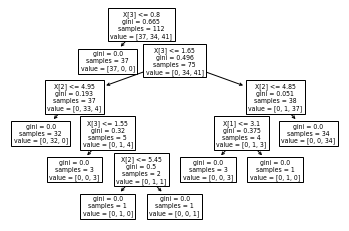

In [21]:
# importer iris dataset
from sklearn.datasets import load_iris
# importer train_test_split
from sklearn.model_selection import train_test_split
# importer DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# importer accuracy_score
from sklearn.metrics import accuracy_score
# importer classification_report
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# træner modellen - dvs. vi finder de optimale parametre for vores beslutningstræ
# ved at bruge træningssættet
clf = clf.fit(X_train,y_train)

# visualiserer træet
from sklearn import tree
tree.plot_tree(clf)


# forudsiger responsen for testdatasættet
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



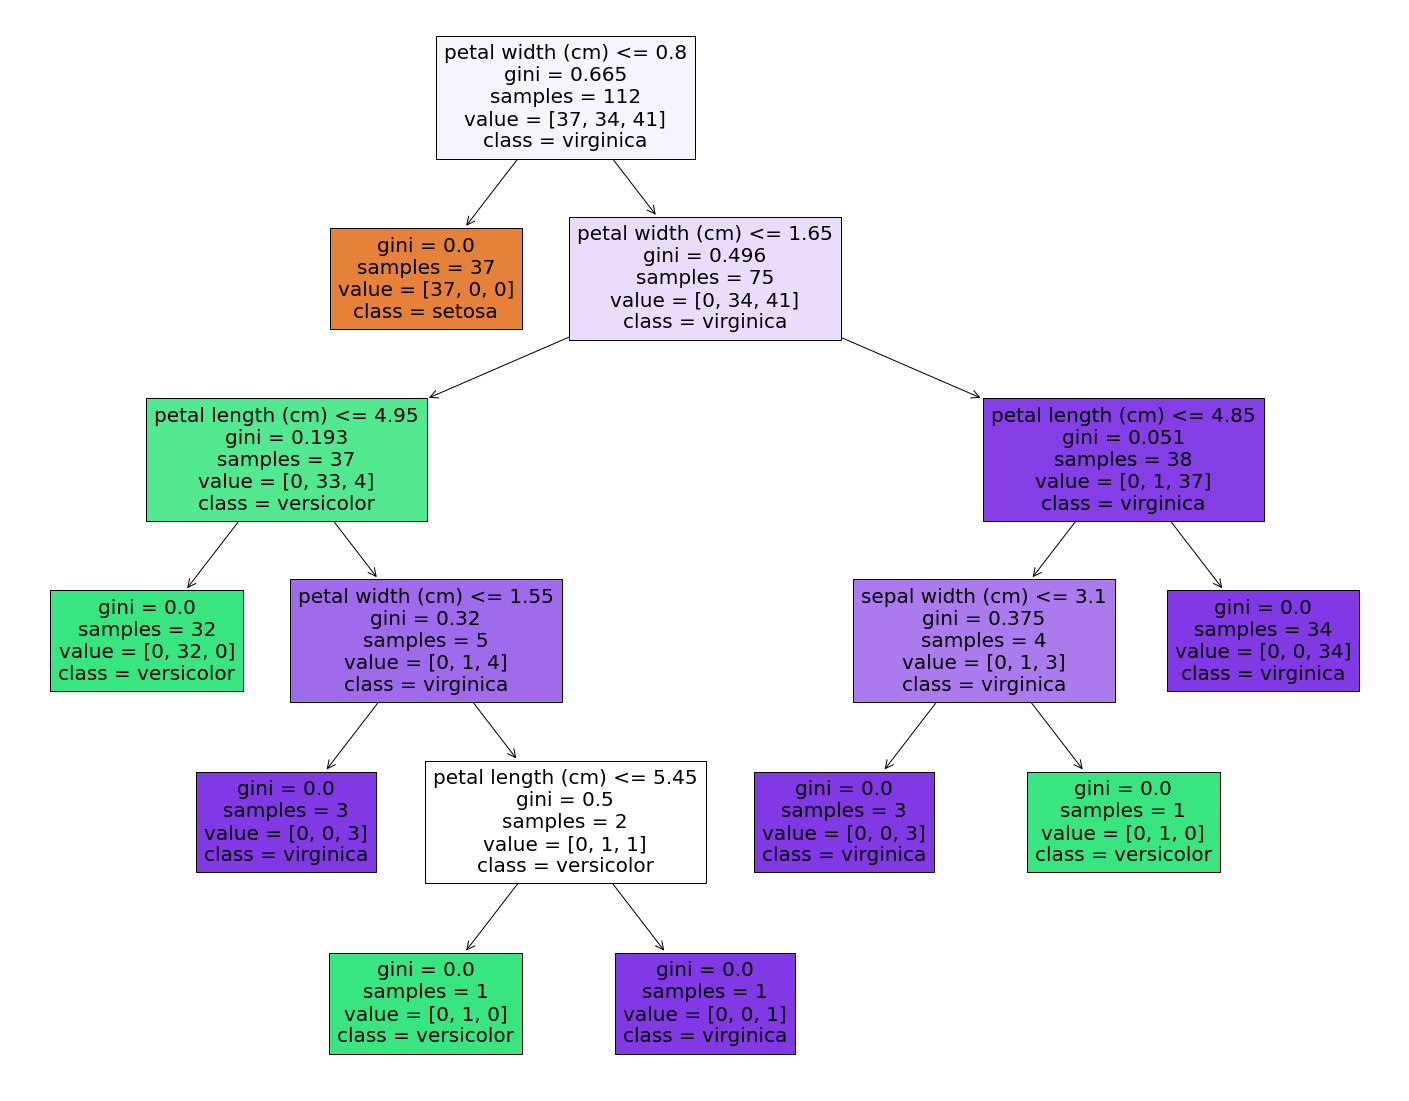

In [22]:
# visualiser beslutningstræet med farver

from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                     feature_names=load_iris().feature_names,
                        class_names=load_iris().target_names,
                          filled=True)



# Fortolkning af beslutningstræet 

I beslutningstræet står der i knuderne:

- petal length: Det


# Beslutningstræer til klassifikation
Vi vil bruge beslutningstræer til at klassificere blomster. Vi starter med at importere de biblioteker, som vi skal bruge.


In [2]:
# Introduktion til beslutningstræer og randomiserede skove 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
#print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Beslutningstræer til regression
Vi vil bruge beslutningstræer til at forudsige huspriser. Vi starter med at importere de biblioteker, som vi skal bruge.



Vi indlæser data og opdeler det i trænings- og testdata:






In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import data from sklearn boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
data = np.c_[boston.data, boston.target]
columns = np.append(boston.feature_names, ["target"])
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

# Visualisering af beslutningstræet
Vi kan visualisere beslutningstræet ved hjælp af biblioteket graphviz. Vi skal først installere graphviz og pydotplus. Det gøres ved at køre følgende kommando i Anaconda Prompt:

conda install -c anaconda graphviz

conda install -c conda-forge pydotplus